In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from calibration import calibrationFunctions as cal
from tweezepy import AV, PSD, MLE

Welcome to mypackage version 1.0.0


# 100 pM DNA with NO BSA and new beads

#### 

Using: ../Data\2025\March\1\100 pM, No BSA, New Beads


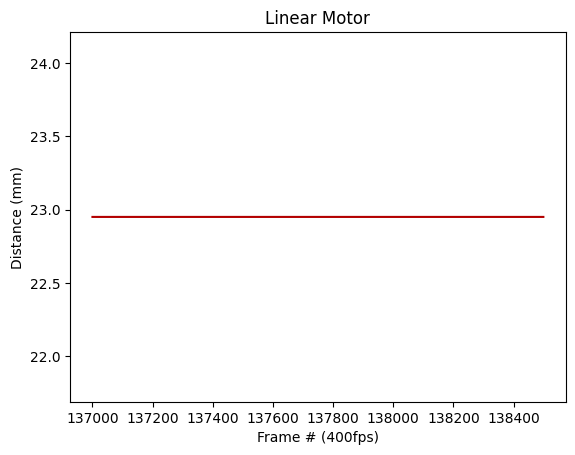

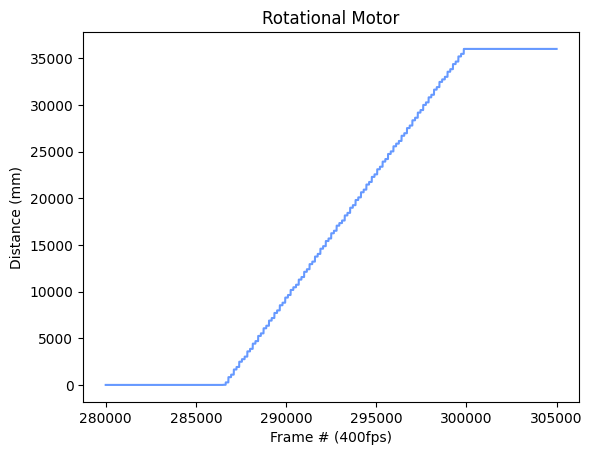

In [3]:
# folderPath = r"C:\Users\Perkins Lab\Desktop\Caleb Maddry\Data\2025\March\1\100 pM, No BSA, New Beads\DataTSV";
folderPath = r"../Data\2025\March\1\100 pM, No BSA, New Beads"

dataFrame = cal.openFiles(folderPath, numRef=1, numExp=4, fps=400) # 5 total beads

lowStart = 32000
lowEnd = 40000

highStart = 54000
highEnd = 58000

forceExtStart = 58000
forceExtEnd = 250000

spinStart = 280000
spinEnd = 305000

plt.plot(dataFrame["linearMotor"][137000:138500], color="#b30000")
plt.xlabel("Frame # (400fps)"); plt.ylabel("Distance (mm)"); plt.title("Linear Motor")
plt.show()

plt.plot(dataFrame["rotationalMotor"][spinStart:spinEnd], color="#6699ff")
plt.xlabel("Frame # (400fps)"); plt.ylabel("Distance (mm)"); plt.title("Rotational Motor")
plt.show()

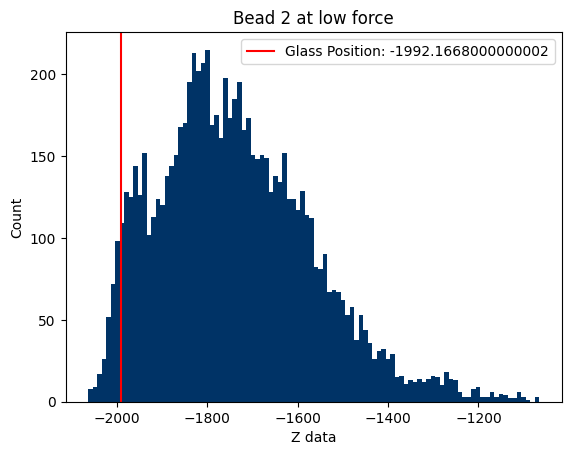

In [4]:
ref = dataFrame["zRefBead1"][lowStart:lowEnd]
exp = dataFrame["zExpBead2"][lowStart:lowEnd]

glassPosition = np.mean(np.sort(exp - ref)[0:675])

plt.hist(exp - ref, bins=100, color="#003366")
plt.axvline(glassPosition, color="red", label=f"Glass Position: {glassPosition}")
plt.title("Bead 2 at low force"); plt.xlabel("Z data"); plt.ylabel("Count")
plt.legend()
plt.show()

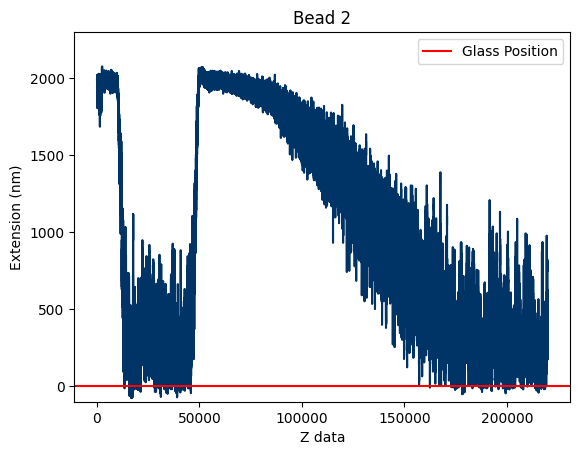

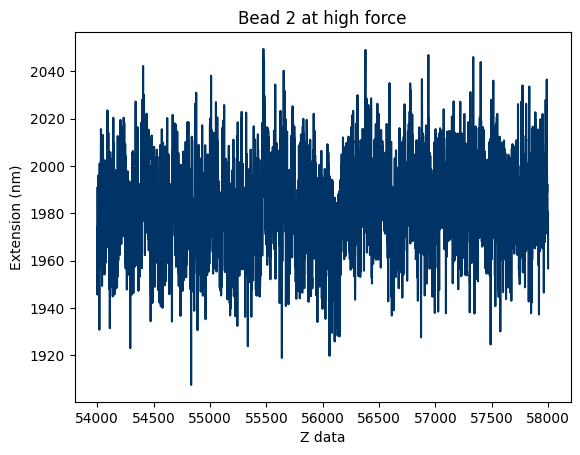

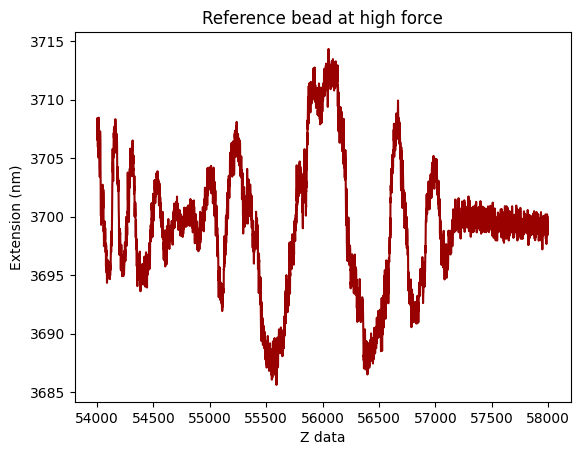

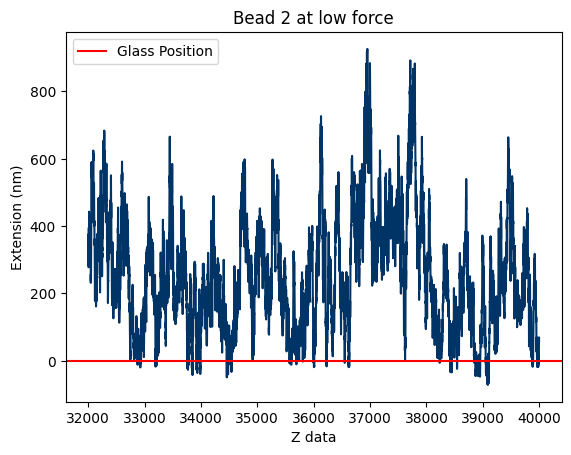

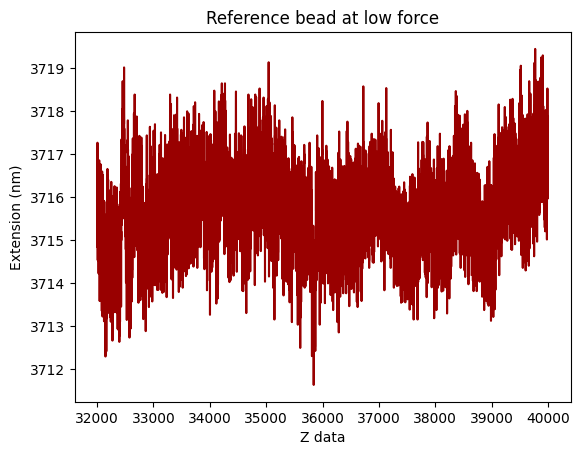

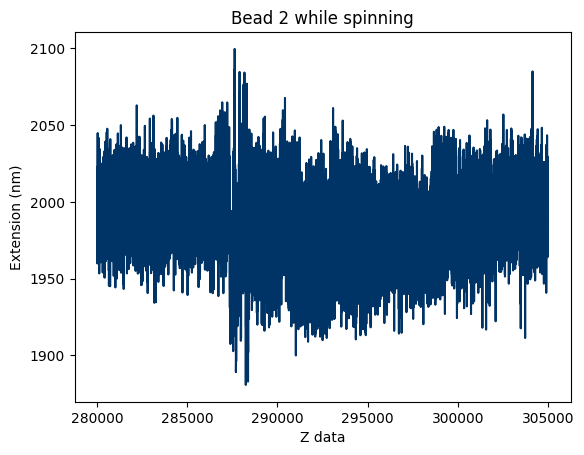

In [5]:
extension = dataFrame["zExpBead2"] - dataFrame["zRefBead1"] - glassPosition
beadX = dataFrame["xExpBead2"] - dataFrame["xRefBead1"]
beadY = dataFrame["yExpBead2"] - dataFrame["yRefBead1"]

plt.plot(extension[0:220000], color="#003366")
plt.axhline(0, color="red", label="Glass Position")
plt.title("Bead 2"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.ylim(-100,2300)
plt.legend()
plt.show()

plt.plot(extension[highStart:highEnd], color="#003366")
plt.title("Bead 2 at high force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(dataFrame["zRefBead1"][highStart:highEnd], color="#990000")
plt.title("Reference bead at high force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(extension[lowStart:lowEnd], color="#003366")
plt.title("Bead 2 at low force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.axhline(0, color="red", label="Glass Position")
plt.legend()
plt.show()

plt.plot(dataFrame["zRefBead1"][lowStart:lowEnd], color="#990000")
plt.title("Reference bead at low force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(extension[spinStart:spinEnd], color="#003366")
plt.title("Bead 2 while spinning"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

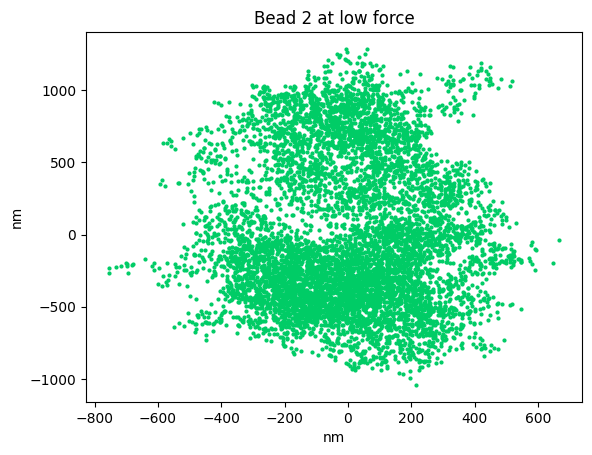

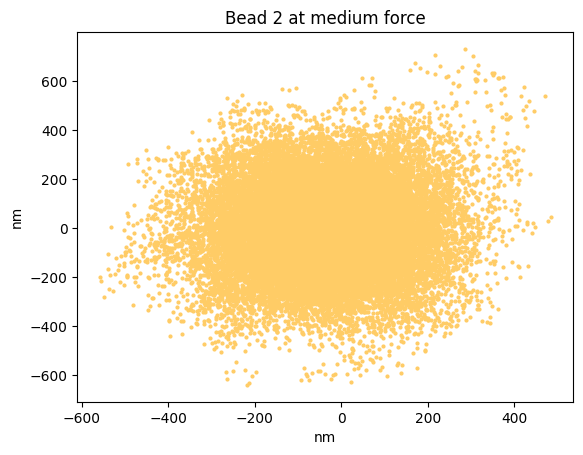

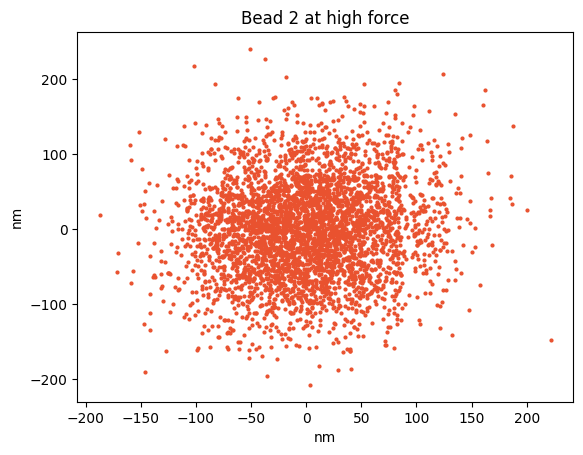

In [6]:
plt.scatter(beadX[lowStart:lowEnd] - np.mean(beadX[lowStart:lowEnd]), beadY[lowStart:lowEnd] - np.mean(beadY[lowStart:lowEnd]), s=4, color='#00cc66')
plt.title("Bead 2 at low force"); plt.xlabel("nm"); plt.ylabel("nm")
plt.show()

plt.scatter(beadX[90000:120000] - np.mean(beadX[10000:110000]), beadY[90000:120000] - np.mean(beadY[90000:120000]), s=4, color='#ffcc66')
plt.title("Bead 2 at medium force"); plt.xlabel("nm"); plt.ylabel("nm")
plt.show()

plt.scatter(beadX[highStart:highEnd] - np.mean(beadX[highStart:highEnd]), beadY[highStart:highEnd] - np.mean(beadY[highStart:highEnd]), s=4, color='#E9522F')
plt.title("Bead 2 at high force"); plt.xlabel("nm"); plt.ylabel("nm")
plt.show()

Low force using AV:  0.02414627057936474
Low force using PSD:  0.022360320404857487
Low force using F = KbT*L/<x>:  0.022494438465774556


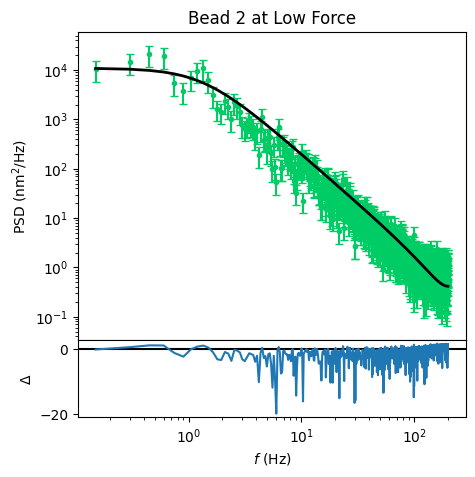

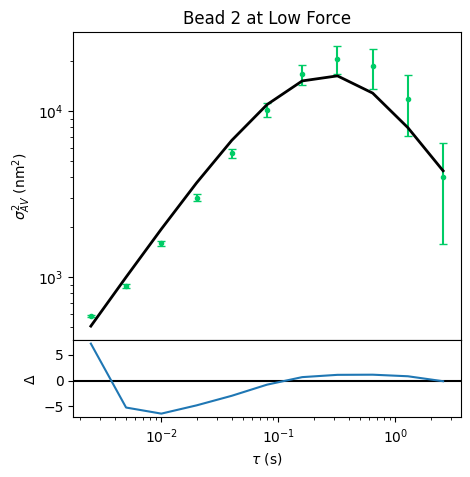

Med force using AV:  0.10782180889809638
Med force using PSD:  0.09400535757820865
Med force using F = KbT*L/<x>:  0.07294813409717141


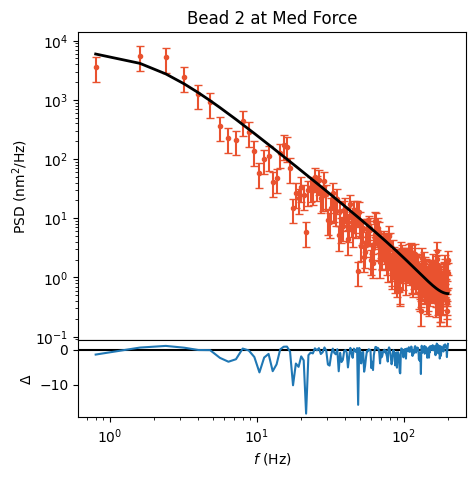

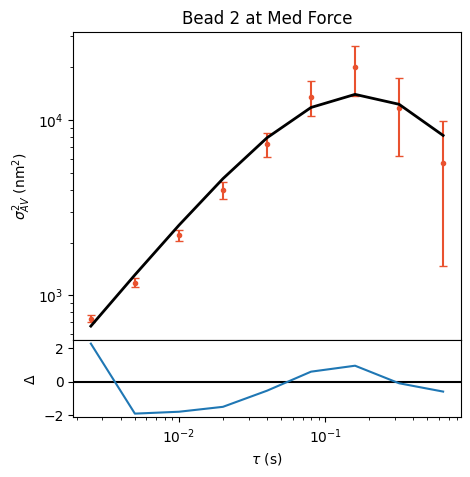

High force using AV:  2.351136958082087
High force using PSD:  2.286420382769346
High force using F = KbT*L/<x>:  1.9953592791899775


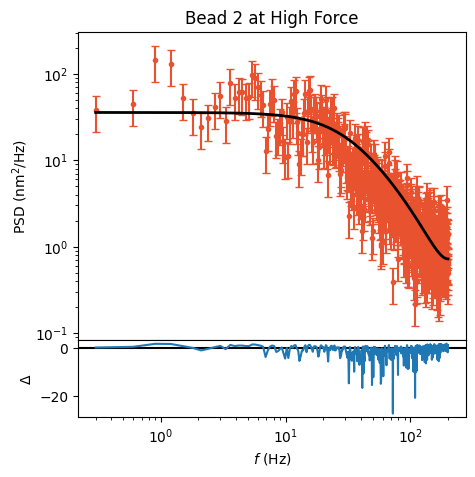

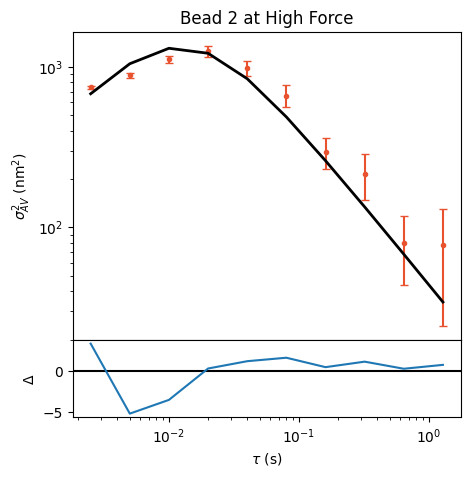

In [7]:
beadDiameter = 1000
fps = 400

medStart = 137000
medEnd = 138500

# Math
psd = PSD(beadX[lowStart:lowEnd], fps, bins=5)
psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
av = AV(beadX[lowStart:lowEnd], fps)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)

# Calculation and printing of the force
force = av.results['k']*np.mean(extension[lowStart:lowEnd])
print('Low force using AV: ', force)
force = psd.results['k']*np.mean(extension[lowStart:lowEnd])
print('Low force using PSD: ', force)
force = 4.1*np.mean(extension[lowStart:lowEnd])/np.var(beadX[lowStart:lowEnd])
print('Low force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig, ax = psd.plot(data_color='#00cc66') #PSD
ax[0].set_title('Bead 2 at Low Force'); ax[0].set_xlabel('f (Hz)');
plt.show()

fig, ax = av.plot(data_color='#00cc66') #AV
ax[0].set_title('Bead 2 at Low Force')
plt.show()

# Math
psd = PSD(beadX[medStart:medEnd], fps, bins=5)
psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
av = AV(beadX[medStart:medEnd], fps)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)


# Calculation and printing of the force
force = av.results['k']*np.mean(extension[medStart:medEnd])
print('Med force using AV: ', force)
force = psd.results['k']*np.mean(extension[medStart:medEnd])
print('Med force using PSD: ', force)
force = 4.1*np.mean(extension[medStart:medEnd])/np.var(beadY[medStart:medEnd])
print('Med force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig, ax = psd.plot(data_color='#E9522F') #PSD
ax[0].set_title('Bead 2 at Med Force'); ax[0].set_xlabel('f (Hz)');
plt.show()

fig, ax = av.plot(data_color='#E9522F') #AV
ax[0].set_title('Bead 2 at Med Force')
plt.show()

# Math
psd = PSD(beadX[highStart:highEnd], fps, bins=5)
psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
av = AV(beadX[highStart:highEnd], fps)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)


# Calculation and printing of the force
force = av.results['k']*np.mean(extension[highStart:highEnd])
print('High force using AV: ', force)
force = psd.results['k']*np.mean(extension[highStart:highEnd])
print('High force using PSD: ', force)
force = 4.1*np.mean(extension[highStart:highEnd])/np.var(beadY[highStart:highEnd])
print('High force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig, ax = psd.plot(data_color='#E9522F') #PSD
ax[0].set_title('Bead 2 at High Force'); ax[0].set_xlabel('f (Hz)');
plt.show()

fig, ax = av.plot(data_color='#E9522F') #AV
ax[0].set_title('Bead 2 at High Force')
plt.show()

Trying to figure out where the force is ~0.1 pN:

In [ ]:
plt.plot(dataFrame["zRefBead1"][137000:138500], color="#990000")
plt.title("Reference bead at high force =+++"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(extension[137000:138500], color="#003366")
plt.title("Tether bead at high force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(dataFrame["linearMotor"][137000:138500])
plt.title("Linear Motor at high force-ish"); plt.xlabel("Linear Motor"); plt.ylabel("Distance (mm)")
plt.show()

### BEAD 3

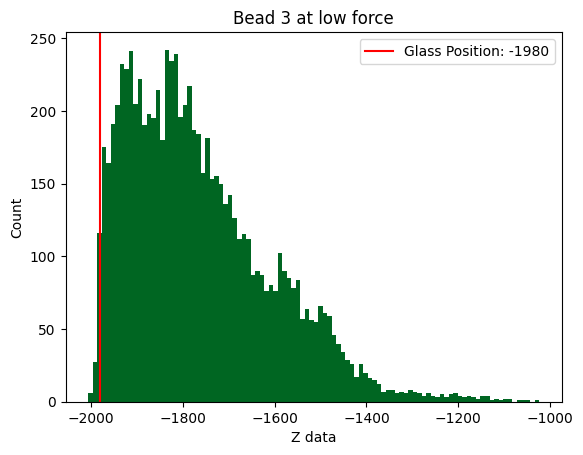

In [8]:
ref = dataFrame["zRefBead1"][lowStart:lowEnd]
exp = dataFrame["zExpBead3"][lowStart:lowEnd]

glassPosition = -1980

plt.hist(exp - ref, bins=100, color="#006622")
plt.axvline(glassPosition, color="red", label=f"Glass Position: {glassPosition}")
plt.title("Bead 3 at low force"); plt.xlabel("Z data"); plt.ylabel("Count")
plt.legend()
plt.show()

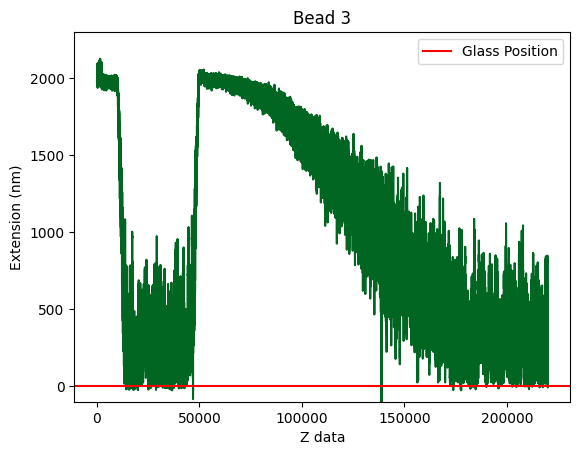

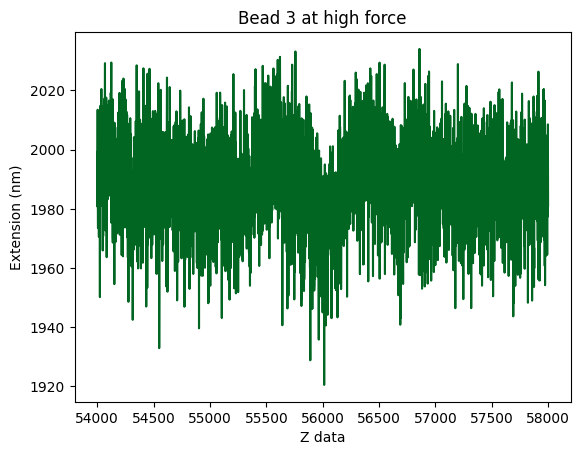

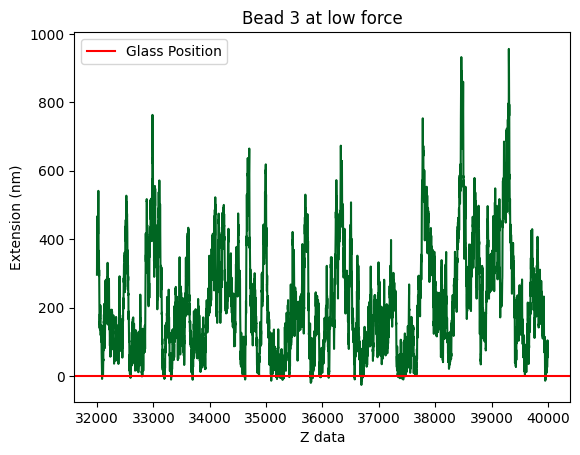

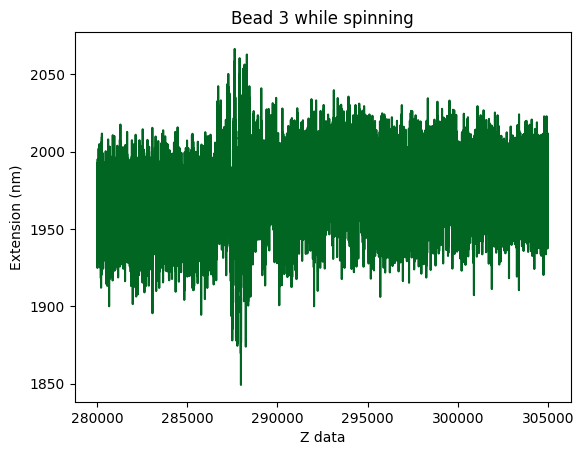

In [9]:
extension = dataFrame["zExpBead3"] - dataFrame["zRefBead1"] - glassPosition
beadX = dataFrame["xExpBead3"] - dataFrame["xRefBead1"]
beadY = dataFrame["yExpBead3"] - dataFrame["yRefBead1"]

plt.plot(extension[0:220000], color="#006622")
plt.axhline(0, color="red", label="Glass Position")
plt.title("Bead 3"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.ylim(-100,2300)
plt.legend()
plt.show()

plt.plot(extension[highStart:highEnd], color="#006622")
plt.title("Bead 3 at high force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

plt.plot(extension[lowStart:lowEnd], color="#006622")
plt.title("Bead 3 at low force"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.axhline(0, color="red", label="Glass Position")
plt.legend()
plt.show()

plt.plot(extension[spinStart:spinEnd], color="#006622")
plt.title("Bead 3 while spinning"); plt.xlabel("Z data"); plt.ylabel("Extension (nm)")
plt.show()

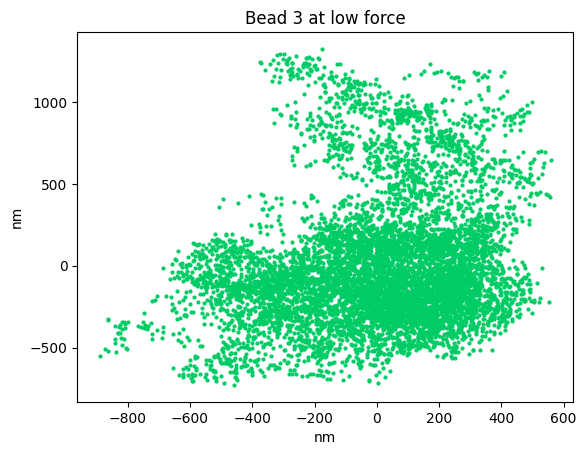

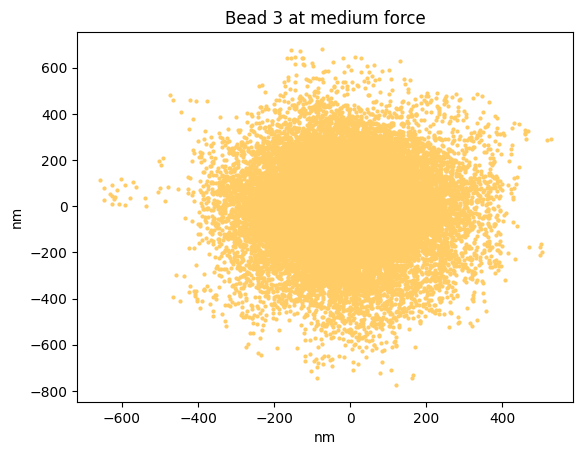

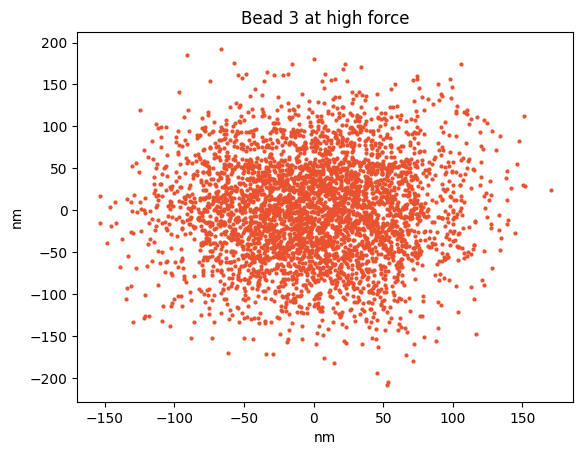

In [10]:
plt.scatter(beadX[lowStart:lowEnd] - np.mean(beadX[lowStart:lowEnd]), beadY[lowStart:lowEnd] - np.mean(beadY[lowStart:lowEnd]), s=4, color='#00cc66')
plt.title("Bead 3 at low force"); plt.xlabel("nm"); plt.ylabel("nm")
plt.show()

plt.scatter(beadX[90000:120000] - np.mean(beadX[10000:110000]), beadY[90000:120000] - np.mean(beadY[90000:120000]), s=4, color='#ffcc66')
plt.title("Bead 3 at medium force"); plt.xlabel("nm"); plt.ylabel("nm")
plt.show()

plt.scatter(beadX[highStart:highEnd] - np.mean(beadX[highStart:highEnd]), beadY[highStart:highEnd] - np.mean(beadY[highStart:highEnd]), s=4, color='#E9522F')
plt.title("Bead 3 at high force"); plt.xlabel("nm"); plt.ylabel("nm")
plt.show()

Low force using AV:  0.018272338999783876
Low force using PSD:  0.01626203526598621
Low force using F = KbT*L/<x>:  0.01339878769105554


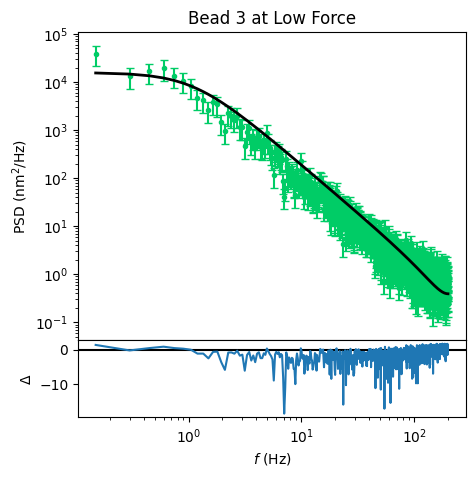

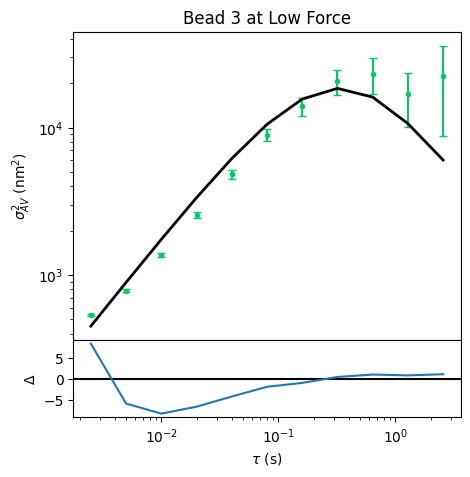

High force using AV:  2.755527635365021
High force using PSD:  2.681731032952081
High force using F = KbT*L/<x>:  3.0120601312780395


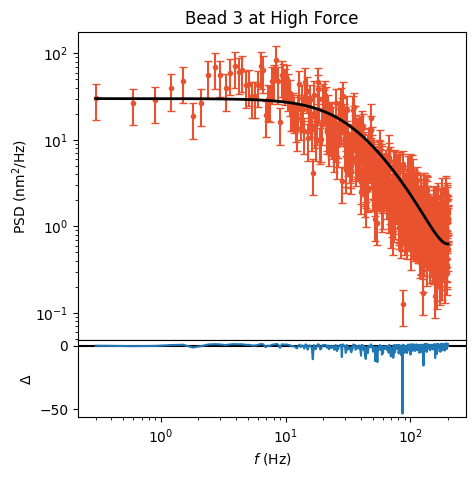

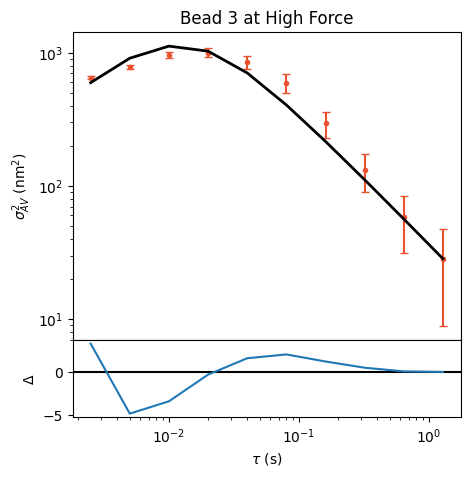

In [11]:
# Math
psd = PSD(beadX[lowStart:lowEnd], fps, bins=5)
psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
av = AV(beadX[lowStart:lowEnd], fps)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)

# Calculation and printing of the force
force = av.results['k']*np.mean(extension[lowStart:lowEnd])
print('Low force using AV: ', force)
force = psd.results['k']*np.mean(extension[lowStart:lowEnd])
print('Low force using PSD: ', force)
force = 4.1*np.mean(extension[lowStart:lowEnd])/np.var(beadX[lowStart:lowEnd])
print('Low force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig, ax = psd.plot(data_color='#00cc66') #PSD
ax[0].set_title('Bead 3 at Low Force'); ax[0].set_xlabel('f (Hz)');
plt.show()

fig, ax = av.plot(data_color='#00cc66') #AV
ax[0].set_title('Bead 3 at Low Force')
plt.show()

# Math
psd = PSD(beadX[highStart:highEnd], fps, bins=5)
psd.mlefit(viscosity=1e-9, radius=beadDiameter/2)
av = AV(beadX[highStart:highEnd], fps)
av.mlefit(viscosity=1e-9, radius=beadDiameter/2)

# Calculation and printing of the force
force = av.results['k']*np.mean(extension[highStart:highEnd])
print('High force using AV: ', force)
force = psd.results['k']*np.mean(extension[highStart:highEnd])
print('High force using PSD: ', force)
force = 4.1*np.mean(extension[highStart:highEnd])/np.var(beadX[highStart:highEnd])
print('High force using F = KbT*L/<x>: ', force)

# Printing of PSD and AV Plots
fig, ax = psd.plot(data_color='#E9522F') #PSD
ax[0].set_title('Bead 3 at High Force'); ax[0].set_xlabel('f (Hz)');
plt.show()

fig, ax = av.plot(data_color='#E9522F') #AV
ax[0].set_title('Bead 3 at High Force')
plt.show()